# 1.张量的数据类型

In [58]:
#导入需要的库
import torch

In [59]:
#获取张量的数据类型
torch.tensor([1.2,3.4]).dtype

torch.float64

In [60]:
#张量的默认数据类型设置为其他类型
torch.set_default_dtype(torch.float64)
torch.tensor([1.2,3.4]).dtype
#注意：set_default_dtype()只支持设置浮点类型数据

torch.float64

In [61]:
##将张量数据类型转化为整形
a=torch.tensor([1.2,3.4])
print("a.dtype:",a.dtype)
print("a.long()方法:",a.long().dtype)
print("a.int()方法:",a.int().dtype)
print("a.float()方法:",a.float().dtype)

a.dtype: torch.float64
a.long()方法: torch.int64
a.int()方法: torch.int32
a.float()方法: torch.float32


In [63]:
#恢复torch默认的数据类型
torch.set_default_tensor_type(torch.FloatTensor)
torch.tensor([1.2,3.4]).dtype

torch.float32

In [64]:
#获取默认的数据类型
torch.get_default_dtype()

torch.float32

# 2.生成张量

### 2.1基本方法

In [2]:
import torch
A = torch.tensor([[1.0,1.0],[2,2]])
A

tensor([[1., 1.],
        [2., 2.]])

In [5]:
## 获取张量的形状
A.shape
A.size()

torch.Size([2, 2])

In [6]:
## 获取张量的形状
A.size()

torch.Size([2, 2])

In [7]:
## 计算张量中所含元素的个数
A.numel()

4

In [10]:
## 指定张量的数据类型和是否计算梯度
B = torch.tensor((1,2,3),dtype=torch.float32,requires_grad=True)
B

tensor([1., 2., 3.], requires_grad=True)

In [36]:
## 因为张量B是可以计算梯度的，所以可以计算sum(B^2)的梯度
y = B.pow(2).sum()
print(y)
y.backward()
B.grad #每一次的梯度会加上之前得到的梯度

tensor(14., grad_fn=<SumBackward0>)


tensor([ 42.,  84., 126.])

In [27]:
## 注意只有浮点类型的张量才允许计算梯度
B = torch.tensor((1,2,3),dtype=torch.int32,requires_grad=True)

RuntimeError: Only Tensors of floating point and complex dtype can require gradients

In [37]:
## 利用torch.Tensor()获得张量
C = torch.Tensor([1,2,3,4])
C

tensor([1., 2., 3., 4.])

In [62]:
## 创建具有特定大小的张量
D = torch.Tensor(2,3)
D

tensor([[8.5764e-07, 1.2801e-11, 2.1029e+20],
        [5.4885e-05, 8.4936e+20, 3.1986e+21]])

In [63]:
## 创建与另一个张量大小和类型相同的张量
torch.ones_like(D)

tensor([[1., 1., 1.],
        [1., 1., 1.]])

In [65]:
torch.zeros_like(D)

tensor([[0., 0., 0.],
        [0., 0., 0.]])

In [69]:
torch.rand_like(D)

tensor([[0.8906, 0.1025, 0.3625],
        [0.4898, 0.1541, 0.6386]])

In [72]:
## 创建一个类型相似但尺寸不同的张量
E = [[1,2],[3,4]]
#print("E.dtype:",E.dtype)
#E 目前是一个list
E = D.new_tensor(E)
print("D.dtype:",D.dtype)
print("E.dtype:",E.dtype)
#E 编程一个tensor
E

D.dtype: torch.float32
E.dtype: torch.float32


tensor([[1., 2.],
        [3., 4.]])

In [76]:
D.new_full((3,3),fill_value = 1)


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [77]:
D.new_zeros((3,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

In [75]:
D.new_empty((3,3))

tensor([[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]])

### 2.2利用numpy数组生成张量

In [99]:
import numpy as np
F = np.ones((3,3))
print(F)
##使用torch.as_tensor()函数
Ftensor = torch.as_tensor(F)
Ftensor

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [101]:
## 使用torch.from_numpy()函数
Ftensor = torch.from_numpy(F)
Ftensor

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]], dtype=torch.float64)

In [103]:
## 使用张量的.numpy()将张量转化为numpy数组
Ftensor.numpy()

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### 2.3设置随机数种子

In [104]:
## 设置随机数种子
torch.manual_seed(123)

In [122]:
## 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean = 0.0,std = torch.tensor(1.0))
A

tensor(-0.1115)

In [1]:
## 通过指定均值和标准差生成随机数
import torch
torch.manual_seed(123)
A = torch.normal(mean = torch.tensor(0.0),std = 1.0)
A

tensor(-0.1115)

In [7]:
## 通过指定均值和标准差生成随机数
torch.manual_seed(123)
A = torch.normal(mean = 0.0, std=torch.arange(1,5.0))#不包含END 
B = torch.normal(mean = 0.0, std=torch.range(1,5.0))#包含END
print(A)
print(A.dtype)
print(B)
print(B.dtype)

tensor([-0.1115,  0.2407, -1.1089, -0.9617])
torch.float32
tensor([-1.1969,  0.4185, -2.9171, -3.0202,  1.6195])
torch.float32


e:\anaconda3\envs\py37\lib\site-packages\ipykernel_launcher.py:4: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  after removing the cwd from sys.path.


In [8]:
## 在区间（0,1）上生成服从均匀分布的张量
torch.manual_seed(123)
B = torch.rand(3,4)
B

tensor([[0.2961, 0.5166, 0.2517, 0.6886],
        [0.0740, 0.8665, 0.1366, 0.1025],
        [0.1841, 0.7264, 0.3153, 0.6871]])

In [9]:
# 生成和其他张量尺寸相同的随机数张量
torch.manual_seed(123)
C = torch.ones(2,3)
D = torch.rand_like(C)
D

tensor([[0.2961, 0.5166, 0.2517],
        [0.6886, 0.0740, 0.8665]])

In [10]:
## 生成服从标准正态分布的随机数
print(torch.randn(3,3))
print(torch.randn_like(C))

tensor([[ 0.9447,  0.6217, -1.3501],
        [-0.1881, -2.3891, -0.4759],
        [ 1.7603,  0.6547,  0.5490]])
tensor([[ 0.3671,  0.1219,  0.6466],
        [-1.4168,  0.8429, -0.6307]])


In [23]:
## 将0~10(不包括10)之间的整数随机排序
torch.manual_seed(123)
torch.randperm(10)


tensor([2, 0, 8, 1, 3, 7, 4, 9, 5, 6])

### 2.4其他生成张量的函数

In [24]:
## 使用torch.arange()生成张量
torch.arange(start=0, end=10, step=2)

tensor([0, 2, 4, 6, 8])

In [32]:
## 在范围内生成固定数量的等间隔张量
torch.linspace(start=1,end=10,steps=5)

tensor([ 1.0000,  3.2500,  5.5000,  7.7500, 10.0000])

In [33]:
## 生成以对数间隔的点
torch.logspace(start=0.1,end=1.0,steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [38]:
10**torch.linspace(start=0.1,end=1.0,steps=5)

tensor([ 1.2589,  2.1135,  3.5481,  5.9566, 10.0000])

In [39]:
torch.linspace(start=0.1,end=1.0,steps=5)

tensor([0.1000, 0.3250, 0.5500, 0.7750, 1.0000])

In [45]:
#torch.zeros(3,3)
#torch.ones(3,3)
torch.eye(3)
#torch.empty(3,3)
#torch.full((3,3),fill_value=0.25)

tensor([[1., 0., 0.],
        [0., 1., 0.],
        [0., 0., 1.]])

# 3.张量的操作

### 3.1改变张量的尺寸

In [61]:
## 使用tensor.reshape()函数设置张量的尺寸
A = torch.arange(12.0).reshape(3,4)
A

tensor([[ 0.,  1.,  2.,  3.],
        [ 4.,  5.,  6.,  7.],
        [ 8.,  9., 10., 11.]])

In [59]:
## 使用torch.reshape()
torch.reshape(input=A, shape=(2,-1))

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [62]:
## 使用resize_方法
A.resize_(2,6)
A

tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])

In [65]:
## 使用
B = torch.arange(10.0,19.0).reshape(3,3)
B
A.resize_as_(B)

tensor([[0., 1., 2.],
        [3., 4., 5.],
        [6., 7., 8.]])

In [66]:
B

tensor([[10., 11., 12.],
        [13., 14., 15.],
        [16., 17., 18.]])

In [69]:
## torch.unsqueeze()返回在指定维度插入尺寸为1的新张量
A=torch.arange(12.0).reshape(2,6)
B=torch.unsqueeze(A,dim=0)
print(B.shape)
B

torch.Size([1, 2, 6])


tensor([[[ 0.,  1.,  2.,  3.,  4.,  5.],
         [ 6.,  7.,  8.,  9., 10., 11.]]])

In [81]:
## torch.squeeze()函数移除所有维度为1的维度
C= B.unsqueeze(dim=3)
print("C.shape:",C.shape)
#print(C)
D= torch.squeeze(C)
print("D.shape:",D.shape)
print(D)
## 移除指定维度为1的维度
E = torch.squeeze(C,dim=0)
print("E.shape:",E.shape)
print(E)

C.shape: torch.Size([1, 2, 6, 1])
D.shape: torch.Size([2, 6])
tensor([[ 0.,  1.,  2.,  3.,  4.,  5.],
        [ 6.,  7.,  8.,  9., 10., 11.]])
E.shape: torch.Size([2, 6, 1])
tensor([[[ 0.],
         [ 1.],
         [ 2.],
         [ 3.],
         [ 4.],
         [ 5.]],

        [[ 6.],
         [ 7.],
         [ 8.],
         [ 9.],
         [10.],
         [11.]]])


In [84]:
## 使用.expand()方法拓展张量

A=torch.arange(3)
A
B=A.expand(3,-1)
B

tensor([[0, 1, 2],
        [0, 1, 2],
        [0, 1, 2]])

In [85]:
## 使用expand_as()方法拓展张量
C= torch.arange(6).reshape(2,3)
B= A.expand_as(C)
B

tensor([[0, 1, 2],
        [0, 1, 2]])

In [87]:
## 使用.repeat()方法拓展张量
## B的shape是(2,3)，首先扩展橙(1,2,3)再按照repeat重复变为(1,4,6)
D= B.repeat(1,2,2)
print(D)
print(D.shape)


tensor([[[0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2],
         [0, 1, 2, 0, 1, 2]]])
torch.Size([1, 4, 6])


### 3.2获取张量中的元素

In [91]:
## 利用切片和索引获取张量中的元素
A = torch.arange(12).reshape(1,3,4)
A

tensor([[[ 0,  1,  2,  3],
         [ 4,  5,  6,  7],
         [ 8,  9, 10, 11]]])

In [92]:
A[0]

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])

In [93]:
## 获取第0维度下的矩阵前两行元素
A[0,0:2,:]

tensor([[0, 1, 2, 3],
        [4, 5, 6, 7]])

In [95]:
## 获取第0维度下的矩阵，最后一行-4~-1列
A[0,-1,-4:-1]

tensor([ 8,  9, 10])

In [96]:
## 根据条件筛选
B=-A
torch.where(A>5,A,B)

tensor([[[ 0, -1, -2, -3],
         [-4, -5,  6,  7],
         [ 8,  9, 10, 11]]])

In [97]:
## 获取A中某个元素
A[0,2,3]

tensor(11)

In [98]:
## 获取矩阵张量的下三角部分
torch.tril(A,diagonal=0)

tensor([[[ 0,  0,  0,  0],
         [ 4,  5,  0,  0],
         [ 8,  9, 10,  0]]])

In [99]:
## diagonal参数控制对角线从哪个元素开始
torch.tril(A,diagonal=1)

tensor([[[ 0,  1,  0,  0],
         [ 4,  5,  6,  0],
         [ 8,  9, 10, 11]]])

In [100]:
## 获取矩阵张量的上三角部分
torch.triu(A,diagonal=0)

tensor([[[ 0,  1,  2,  3],
         [ 0,  5,  6,  7],
         [ 0,  0, 10, 11]]])

In [101]:
torch.triu(A,diagonal=1)

tensor([[[ 0,  1,  2,  3],
         [ 0,  0,  6,  7],
         [ 0,  0,  0, 11]]])

In [102]:
## 获取矩阵张量的上三角部分，input,需要是一个二维的张量
C = A.reshape(3,4)
print(C)
print(torch.diag(C,diagonal=0))
print(torch.diag(C,diagonal=1))

tensor([[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]])
tensor([ 0,  5, 10])
tensor([ 1,  6, 11])


In [103]:
## 提供对角线元素生成矩阵张量
torch.diag(torch.tensor([1,2,3]))

tensor([[1, 0, 0],
        [0, 2, 0],
        [0, 0, 3]])

### 3.3张量的拼接和拆分

In [144]:
## 在给定维度中连接给定的张量序列
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(0,10,6).reshape(2,3)
## 在0维度连接张量
C = torch.cat((A,B),dim=0)
C

tensor([[ 0.,  1.,  2.],
        [ 3.,  4.,  5.],
        [ 0.,  2.,  4.],
        [ 6.,  8., 10.]])

In [108]:
## 在1维度连接张量
D = torch.cat((A,B),dim=1)
D

tensor([[ 0.,  1.,  2.,  0.,  2.,  4.],
        [ 3.,  4.,  5.,  6.,  8., 10.]])

In [111]:
## 在1维度连接3个张量
E = torch.cat((A[:,1:3],A,B),dim=1)## A[:,1:3]表示A张量0维全部，1维元素1~2
E

tensor([[ 1.,  2.,  0.,  1.,  2.,  0.,  2.,  4.],
        [ 4.,  5.,  3.,  4.,  5.,  6.,  8., 10.]])

In [153]:
## 沿着新维度连接张量
F = torch.stack((A,B),dim=1)
print(F)
F.shape ## 两个2x3的矩阵组合在一起

tensor([[[ 0.,  1.,  2.],
         [ 0.,  2.,  4.]],

        [[ 3.,  4.,  5.],
         [ 6.,  8., 10.]]])


torch.Size([2, 2, 3])

In [122]:
G = torch.stack((A,B),dim=2)
print(G)
G.shape

tensor([[[[1, 2],
          [1, 3]],

         [[3, 4],
          [3, 5]]],


        [[[5, 6],
          [5, 7]],

         [[7, 8],
          [7, 9]]]])


torch.Size([2, 2, 2, 2])

In [123]:
## 将张量分割为特定数量的块
## 在行上将张量E分为两块
torch.chunk(E,2,dim=0)

(tensor([[1., 2., 0., 1., 2., 0., 2., 4.]]),
 tensor([[ 4.,  5.,  3.,  4.,  5.,  6.,  8., 10.]]))

In [136]:
D1,D2=torch.chunk(E,2,dim=1)
print(D1)
print(D2)

tensor([[1., 2., 0., 1.],
        [4., 5., 3., 4.]])
tensor([[ 2.,  0.,  2.,  4.],
        [ 5.,  6.,  8., 10.]])


In [139]:
## 如果沿给定维度dim的张量大小不能被整除，则最后一个块将最小
E1,E2,E3=torch.chunk(E,3,dim=1)
print(E1)
print(E2)
print(E3)

tensor([[1., 2., 0.],
        [4., 5., 3.]])
tensor([[1., 2., 0.],
        [4., 5., 6.]])
tensor([[ 2.,  4.],
        [ 8., 10.]])


In [154]:
## 将张量切分为块，指定每块的大小
D1,D2,D3=torch.split(D,[1,2,3],dim=1)
print(D1)
print(D2)
print(D3)

tensor([[0.],
        [3.]])
tensor([[1., 2.],
        [4., 5.]])
tensor([[ 0.,  2.,  4.],
        [ 6.,  8., 10.]])


### 3.4张量计算 比较大小

In [155]:
## 比较两个数是否接近
A = torch.tensor([10.0])
B = torch.tensor([10.1])
print(torch.allclose(A,B,rtol=1e-05,atol=1e-08,equal_nan=False))
print(torch.allclose(A,B,rtol=0.1,atol=0.01,equal_nan=False))

False
True


In [160]:
## 计算元素是否相等
A = torch.tensor([1,2,3,4,5,6])
B = torch.arange(1,7)
C = torch.unsqueeze(B,dim=0)
print(C)
# torch.eq()是比较内部的元素
print(torch.eq(A,B))
print(torch.eq(A,C))

tensor([[1, 2, 3, 4, 5, 6]])
tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [161]:
## 判断两个张量是否具有相同的尺寸和元素
print(torch.equal(A,B))
print(torch.equal(A,C))

True
False


In [162]:
## 逐元素比较大于等于
print(torch.ge(A,B))
print(torch.ge(A,C))

tensor([True, True, True, True, True, True])
tensor([[True, True, True, True, True, True]])


In [163]:
## 大于
print(torch.gt(A,B))
print(torch.gt(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [164]:
## 小于等于/小于
print(torch.le(A,B))
print(torch.lt(A,C))

tensor([True, True, True, True, True, True])
tensor([[False, False, False, False, False, False]])


In [165]:
## 不等于
print(torch.ne(A,B))
print(torch.ne(A,C))

tensor([False, False, False, False, False, False])
tensor([[False, False, False, False, False, False]])


In [166]:
## 判断是否为缺失值
torch.isnan(torch.tensor([0,1,float("nan"),2]))

tensor([False, False,  True, False])

### 3.5基本运算

In [169]:
## 矩阵逐元素相乘
A = torch.arange(6.0).reshape(2,3)
B = torch.linspace(10,20,6).reshape(2,3)
print("A:",A)
print("B:",B)
print(A*B)
##逐元素相除
print(A/B)

A: tensor([[0., 1., 2.],
        [3., 4., 5.]])
B: tensor([[10., 12., 14.],
        [16., 18., 20.]])
tensor([[  0.,  12.,  28.],
        [ 48.,  72., 100.]])
tensor([[0.0000, 0.0833, 0.1429],
        [0.1875, 0.2222, 0.2500]])


In [172]:
## 逐元素相加
print(A+B)
## 逐元素相减
print(A-B)
## 逐元素相除
print(B/A)

tensor([[10., 13., 16.],
        [19., 22., 25.]])
tensor([[-10., -11., -12.],
        [-13., -14., -15.]])
tensor([[    inf, 12.0000,  7.0000],
        [ 5.3333,  4.5000,  4.0000]])


In [173]:
## 张量的幂
print(torch.pow(A,3))
print(A**3)

tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])
tensor([[  0.,   1.,   8.],
        [ 27.,  64., 125.]])


In [174]:
## 张量的指数
torch.exp(A)

tensor([[  1.0000,   2.7183,   7.3891],
        [ 20.0855,  54.5981, 148.4132]])

In [175]:
## 张量的对数
torch.log(A)

tensor([[  -inf, 0.0000, 0.6931],
        [1.0986, 1.3863, 1.6094]])

In [176]:
## 张量的平方根
print(torch.sqrt(A))
print(A**0.5)

tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])
tensor([[0.0000, 1.0000, 1.4142],
        [1.7321, 2.0000, 2.2361]])


In [177]:
## 张量的平方根倒数
print(torch.rsqrt(A))
print(1/A**0.5)

tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])
tensor([[   inf, 1.0000, 0.7071],
        [0.5774, 0.5000, 0.4472]])


In [179]:
## 张量的数据裁剪
#元素超过4，按4算
torch.clamp_max(A,4)

tensor([[0., 1., 2.],
        [3., 4., 4.]])

In [180]:
## 张量数据裁剪
torch.clamp_min(A,3)

tensor([[3., 3., 3.],
        [3., 4., 5.]])

In [182]:
## 张量数据裁剪
## 规定上下限
torch.clamp(A,2.5,4)

tensor([[2.5000, 2.5000, 2.5000],
        [3.0000, 4.0000, 4.0000]])

In [183]:
## 矩阵的转置
C = torch.t(A)
C

tensor([[0., 3.],
        [1., 4.],
        [2., 5.]])

In [185]:
## 矩阵运算，矩阵相乘，A的行数要等于C的列数
A.matmul(C)

tensor([[ 5., 14.],
        [14., 50.]])

In [186]:
A = torch.arange(12.0).reshape(2,2,3)
B = torch.arange(12.0).reshape(2,3,2)
print(A)
print(B)
AB = torch.matmul(A,B)
AB

tensor([[[ 0.,  1.,  2.],
         [ 3.,  4.,  5.]],

        [[ 6.,  7.,  8.],
         [ 9., 10., 11.]]])
tensor([[[ 0.,  1.],
         [ 2.,  3.],
         [ 4.,  5.]],

        [[ 6.,  7.],
         [ 8.,  9.],
         [10., 11.]]])


tensor([[[ 10.,  13.],
         [ 28.,  40.]],

        [[172., 193.],
         [244., 274.]]])

In [187]:
## 矩阵相乘只计算最后面的两个维度的乘法
print(AB[0].eq(torch.matmul(A[0],B[0])))
print(AB[1].eq(torch.matmul(A[1],B[1])))

tensor([[True, True],
        [True, True]])
tensor([[True, True],
        [True, True]])


In [188]:
## 计算矩阵的逆
C = torch.rand(3,3)
D = torch.inverse(C)
torch.mm(C,D) #矩阵和矩阵的逆相乘得到单位矩阵

tensor([[ 1.0000e+00,  2.9802e-08, -1.1921e-07],
        [ 2.9802e-08,  1.0000e+00, -5.9605e-08],
        [ 0.0000e+00,  5.9605e-08,  1.0000e+00]])

In [189]:
## 计算矩阵的迹，对角线元素的和
torch.trace(torch.arange(9.0).reshape(3,3))

tensor(12.)

### 3.6统计相关的计算

#### 3.6.1 1D和2D张量获取最大值和最小值 

In [192]:
## 1维张量的最大值和最小值
A = torch.tensor([12.,34.,25,11,67,32,29,30,99,55,23,44])
## 最大值和位置
print("最大值：",A.max())
print("最大值位置：",A.argmax())
## 最小值和位置
print("最小值：",A.min())
print("最小值位置：",A.argmin())

最大值： tensor(99.)
最大值位置： tensor(8)
最小值： tensor(11.)
最小值位置： tensor(3)


In [197]:
## 二维张量的最大值和最小值
B = A.reshape(3,4)
print("2-D张量B:\n",B)
## 最大值以及位置（每行）
print("最大值:\n",B.max(dim=1))
print("最大值位置：",B.argmax(dim=1))
## 最小值以及位置（每行）
print("最小值:\n",B.min(dim=0))
print("最小值位置：",B.argmin(dim=0))

2-D张量B:
 tensor([[12., 34., 25., 11.],
        [67., 32., 29., 30.],
        [99., 55., 23., 44.]])
最大值:
 torch.return_types.max(
values=tensor([34., 67., 99.]),
indices=tensor([1, 0, 0]))
最大值位置： tensor([1, 0, 0])
最小值:
 torch.return_types.min(
values=tensor([12., 32., 23., 11.]),
indices=tensor([0, 1, 2, 0]))
最小值位置： tensor([0, 1, 2, 0])


#### 3.6.2 1D和2D张量排序

In [198]:
## 张量排序，分别输出从小到大的排序结果和相应的元素在元素位置的索引
torch.sort(A)

torch.return_types.sort(
values=tensor([11., 12., 23., 25., 29., 30., 32., 34., 44., 55., 67., 99.]),
indices=tensor([ 3,  0, 10,  2,  6,  7,  5,  1, 11,  9,  4,  8]))

In [199]:
## 按照降序排列
torch.sort(A,descending=True)

torch.return_types.sort(
values=tensor([99., 67., 55., 44., 34., 32., 30., 29., 25., 23., 12., 11.]),
indices=tensor([ 8,  4,  9, 11,  1,  5,  7,  6,  2, 10,  0,  3]))

In [200]:
## 对2-D张量进行排序
Bsort,Bsort_id=torch.sort(B)
print("B sort:\n",Bsort)
print("B sort index:\n",Bsort_id)
print("B argsort:\n",torch.argsort(B))

B sort:
 tensor([[11., 12., 25., 34.],
        [29., 30., 32., 67.],
        [23., 44., 55., 99.]])
B sort index:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])
B argsort:
 tensor([[3, 0, 2, 1],
        [2, 3, 1, 0],
        [2, 3, 1, 0]])


In [202]:
## 获取张量前几大的数值
torch.topk(A,4)

torch.return_types.topk(
values=tensor([99., 67., 55., 44.]),
indices=tensor([ 8,  4,  9, 11]))

In [203]:
## 获取2D张量每列前几大的数值
Btop2,Btop2_id=torch.topk(B,2,dim=0)
print("B 每列 top2:\n",Btop2)
print("B 每列 top2 位置:\n",Btop2_id)

B 每列 top2:
 tensor([[99., 55., 29., 44.],
        [67., 34., 25., 30.]])
B 每列 top2 位置:
 tensor([[2, 2, 1, 2],
        [1, 0, 0, 1]])


In [204]:
## 获取张量第K小的数值和位置
torch.kthvalue(A,3)

torch.return_types.kthvalue(
values=tensor(23.),
indices=tensor(10))

In [205]:
## 获取2D张量第K小的数值和位置
torch.kthvalue(B,3,dim=1)

torch.return_types.kthvalue(
values=tensor([25., 32., 55.]),
indices=tensor([2, 1, 1]))

In [207]:
## 获取2D张量第K小的数值和位置
Bkth,Bkth_id=torch.kthvalue(B,3,dim=1,keepdim=True)
print(Bkth)
print(Bkth_id)


tensor([[25.],
        [32.],
        [55.]])
tensor([[2],
        [1],
        [1]])


#### 3.6.3 1D和2D张量计算平均值

In [211]:
## 平均值，计算每行的均值
print(torch.mean(B,dim=1,keepdim=True))
## 平均值，计算每列的均值
print(torch.mean(B,dim=0,keepdim=True))

tensor([[20.5000],
        [39.5000],
        [55.2500]])
tensor([[59.3333, 40.3333, 25.6667, 28.3333]])


#### 3.6.4 计算和，计算累加和，计算中位数，计算乘积，计算累乘积

In [212]:
## 计算每行的和
print(torch.sum(B,dim=1,keepdim=True))
## 计算每列的和
print(torch.sum(B,dim=0,keepdim=True))

tensor([[ 82.],
        [158.],
        [221.]])
tensor([[178., 121.,  77.,  85.]])


In [213]:
## 按照行计算累加和
print(torch.cumsum(B,dim=1))
## 按照列计算累加和
print(torch.cumsum(B,dim=0))

tensor([[ 12.,  46.,  71.,  82.],
        [ 67.,  99., 128., 158.],
        [ 99., 154., 177., 221.]])
tensor([[ 12.,  34.,  25.,  11.],
        [ 79.,  66.,  54.,  41.],
        [178., 121.,  77.,  85.]])


In [214]:
## 计算每行的中位数
print(torch.median(B,dim=1,keepdim=True))
## 计算每列的中位数
print(torch.median(B,dim=0,keepdim=True))

torch.return_types.median(
values=tensor([[12.],
        [30.],
        [44.]]),
indices=tensor([[0],
        [3],
        [3]]))
torch.return_types.median(
values=tensor([[67., 34., 25., 30.]]),
indices=tensor([[1, 0, 0, 1]]))


In [215]:
## 按照行计算乘积
print(torch.prod(B,dim=1,keepdim=True))
## 按照列计算乘积
print(torch.prod(B,dim=0,keepdim=True))

tensor([[ 112200.],
        [1865280.],
        [5510340.]])
tensor([[79596., 59840., 16675., 14520.]])


In [216]:
## 按照行计算累乘积
print(torch.cumprod(B,dim=1))
## 按照列计算累乘积
print(torch.cumprod(B,dim=0))

tensor([[1.2000e+01, 4.0800e+02, 1.0200e+04, 1.1220e+05],
        [6.7000e+01, 2.1440e+03, 6.2176e+04, 1.8653e+06],
        [9.9000e+01, 5.4450e+03, 1.2524e+05, 5.5103e+06]])
tensor([[1.2000e+01, 3.4000e+01, 2.5000e+01, 1.1000e+01],
        [8.0400e+02, 1.0880e+03, 7.2500e+02, 3.3000e+02],
        [7.9596e+04, 5.9840e+04, 1.6675e+04, 1.4520e+04]])


In [217]:
## 标准差
print(torch.std(A))

tensor(25.0108)


# 4 Torch.nn模块

### 4.1 torch.nn.Conv2d()
使用一张图像来展示经过卷积后的图像效果
使用灰度图像

In [227]:
## 使用一张图像来展示经过卷积后的图像效果
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

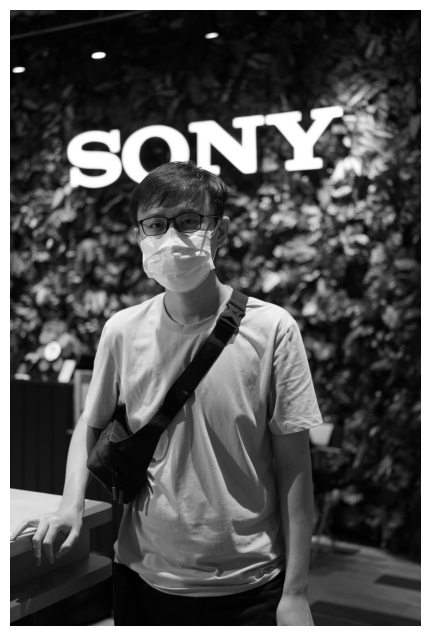

In [269]:
## 读取图像--转化为灰度图片--转化为numpy数组
myim = Image.open("E:\Repositories\Machine-learning\EE_6227\ML_ASSIGNMENT\DSC00010.JPG")
myimgray = np.array(myim.convert("L"),dtype=np.float32)
## 利用np.rot90来旋转图片90度，初始导入图片的方向是不对的
myimrotate = np.rot90(myimgray) 
## 可视化图片
plt.figure(figsize=(10,8))
plt.imshow(myimrotate,cmap=plt.cm.gray)
plt.axis("off")
plt.show()